<a href="https://colab.research.google.com/github/Ian-Ibrahim/SU-Machine-learning-1222785/blob/main/Logistic_regression_24thAprilMLCLASS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split as tst

from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture

from sklearn.metrics import accuracy_score as acc

In [ ]:
# Data

X, y = make_moons(n_samples=50, noise=0.3, random_state=42)

outliers = np.array([[-1.5, 2], [2, 1], [0, 3], [-0.5, -1.5], [1.5, -1], [-2, -1], [1, 2.5], [-1, -2], [2.5, 0], [-2,1]])
X=np.concatenate([X, outliers], axis=0)
y=np.concatenate([y, [0]*len(outliers)])
print(X)
print(y)

[[-0.17259174  0.98148684]
 [ 1.03409609 -0.69944043]
 [ 0.49129952  0.36549375]
 [ 1.75557412  0.11266939]
 [-0.9667089   0.67063777]
 [ 1.85742242  0.8267463 ]
 [ 0.10545508 -0.04855127]
 [-0.65350027  0.18683108]
 [ 0.44304668 -0.19609371]
 [-0.56959548  0.05778646]
 [ 0.16933927  1.0076502 ]
 [ 1.00798338  0.69775718]
 [ 1.7022239  -0.17870444]
 [ 0.52892494  0.99175604]
 [ 0.6379712   0.06832225]
 [ 0.14440375  0.29707214]
 [ 1.69089153 -0.6380416 ]
 [ 2.06669231  0.50841495]
 [ 2.02940193  0.42029435]
 [-0.65158399  0.89028319]
 [ 0.82336582  0.58671003]
 [-0.21499838  1.38398034]
 [-0.86263448 -0.50528621]
 [ 0.71537013 -0.44821522]
 [ 0.43323164  0.01372992]
 [ 0.76608944 -0.25316891]
 [ 1.74819318 -0.39842873]
 [ 0.0792209   0.20715458]
 [ 1.29005847 -0.67355267]
 [ 0.55873899  0.73594435]
 [ 0.39578613  0.68616779]
 [ 0.61740234  1.23856478]
 [ 0.95739158 -0.22245575]
 [ 0.80834826  0.03567642]
 [-1.36860681  0.31402918]
 [ 1.25471821  0.19591131]
 [ 1.4748939  -0.31504022]
 

In [ ]:
X_train, X_test, y_train, y_test = tst(X, y, test_size=0.2, random_state=42)

In [ ]:
lr= LogisticRegression(random_state=42)
lr.fit(X_train,y_train)


LogisticRegression(random_state=42)

In [ ]:
# for gm you need to specify number of componets
gm= GaussianMixture(random_state=42,n_components=2)
gm.fit(X_train)
# gm uses only X_train for fit

GaussianMixture(n_components=2, random_state=42)

In [ ]:
y_pred_lr=lr.predict(X_test)
acc_lr=acc(y_test, y_pred_lr)
print(acc_lr)

y_pred_gm=gm.predict(X_test)
acc_gm=acc(y_test,y_pred_gm)
print(acc_gm)

0.75
0.75


Text(0.5, 1.0, 'LR Disc Boundary')

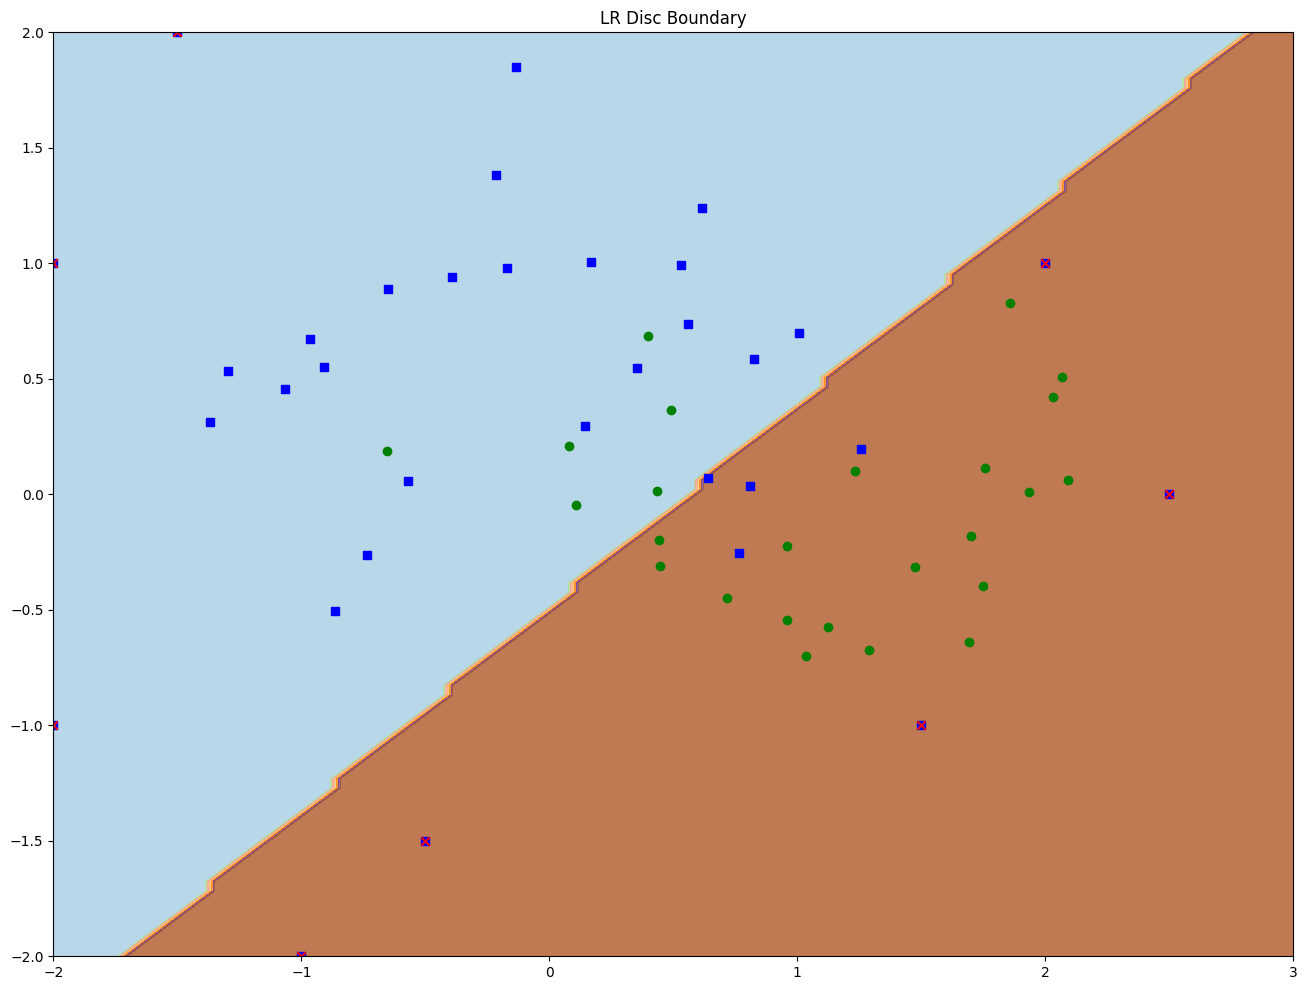

In [ ]:
# LR plot
# figsize is measured in inches
fig,ax=plt.subplots(figsize=(16,12))
xx,yy=np.meshgrid(np.linspace(-2,3,100),np.linspace(-2,2,100))
z_lr=lr.predict(np.c_[xx.ravel(),yy.ravel()])
z_lr= z_lr.reshape(xx.shape)
ax.contourf(xx,yy,z_lr,cmap=plt.cm.Paired,alpha=0.8)

ax.scatter(X[y==0][:, 0], X[y==0][:, 1], c='b', marker='s', label='Class 0')
ax.scatter(X[y==1][:, 0], X[y==1][:, 1], c='g', marker='o', label='Class 1')
ax.scatter(outliers[:, 0], outliers[:, 1], c='r', marker='x', label='Outliers')

ax.set_xlim(-2, 3)
ax.set_ylim(-2, 2)

ax.set_title('LR Disc Boundary')

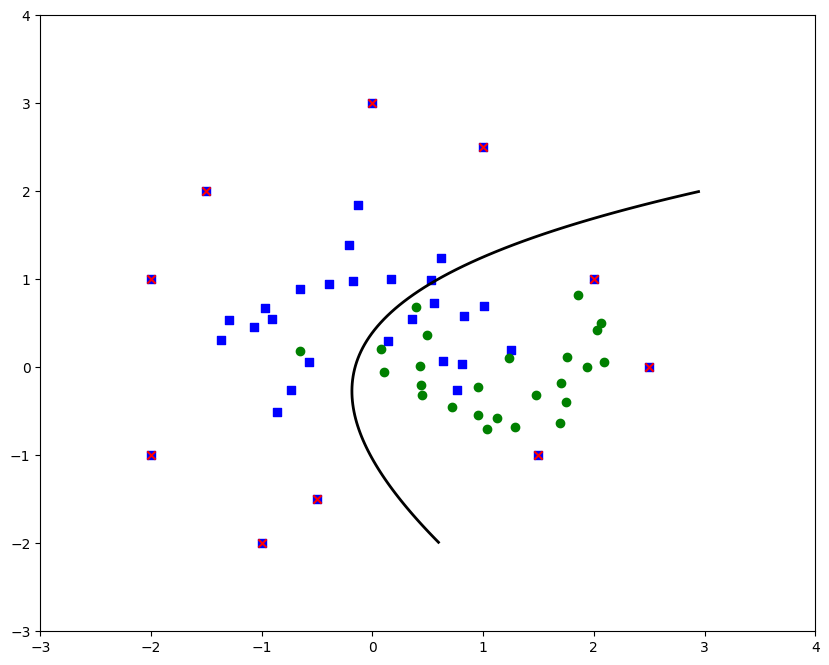

In [ ]:
# GMM

fig, ax = plt.subplots(figsize=(10, 8))
Z_gm = gm.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_gm = Z_gm.reshape(xx.shape)
ax.contour(xx, yy, Z_gm, levels=[0.5], colors='k', linewidths=2)

ax.scatter(X[y==0][:, 0], X[y==0][:, 1], c='b', marker='s', label='Class 0')
ax.scatter(X[y==1][:, 0], X[y==1][:, 1], c='g', marker='o', label='Class 1')
ax.scatter(outliers[:, 0], outliers[:, 1], c='r', marker='x', label='Outliers')

plt.xlim(-3, 4)
plt.ylim(-3, 4)
plt.show()